- ### Dataset Source (Kaggle):
> [**take a look at the dataset** (click the link to view it)](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

- ### What is Cardiovascular diseases (CVDs)  
    **Cardiovascular diseases (CVDs)** are conditions affecting the heart and blood vessels, the leading global cause of death, encompassing issues like coronary artery disease (heart attacks), stroke, heart failure, and peripheral artery disease. They often stem from plaque buildup narrowing arteries, and are strongly linked to risk factors like **smoking, high blood pressure, unhealthy diet, lack of exercise, obesity, high cholesterol, and diabetes**.

- ### Problem Statement
    Cardiovascular disease often develops gradually and may remain undetected until serious complications occur. Early identification of at-risk individuals is therefore critical for prevention and timely intervention.  
    
    This project aims to predict the presence of cardiovascular disease using machine-learning techniques applied to clinical and lifestyle data.

- ### Motivation

    Cardiovascular risk is influenced by multiple interacting factors such as age, blood pressure, obesity, cholesterol, glucose levels, and lifestyle habits. Evaluating these factors together is difficult using traditional analysis methods.

    Machine learning enables the modeling of complex relationships between these variables, allowing both accurate prediction and better understanding of cardiovascular risk patterns.

### 1. Importing Libraries

In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### 2. Dataset Understanding & Data Challenges

**Load dataset using pandas**

In [5]:
df = pd.read_csv("cardio.csv")

**Total number of rows and columns**

In [6]:
# total numbe of rows and columns
print("Number of rows in the dataset: ", df.shape[0])
print("Number of columns in the dataset: ", df.shape[1])

Number of rows in the dataset:  70000
Number of columns in the dataset:  13


In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [9]:
# check datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

--- 

### 3. Data Preprocessing & Feature Engineering

**Age was recorded in days, which is not directly interpretable. It was converted into years to improve readability and consistency with medical standards.'**

In [13]:
if 'age' in df.columns:
    df['age_years'] = (df['age'] / 365).astype(int)
    df.drop(columns=['age'], inplace=True)
    

In [14]:
print("number of rows where systolic blood pressure is higher than diastolic pressure:",df[df['ap_hi'] < df['ap_lo']].shape[0])
invalid_ratio = 1234/len(df)
print(f"Impact on dataset: {invalid_ratio*100:.2f}%")

number of rows where systolic blood pressure is higher than diastolic pressure: 1234
Impact on dataset: 1.76%


> **During data inspection, 1234 records were found where systolic blood pressure was lower than diastolic pressure, which is medically invalid. These records were removed to prevent incorrect patterns from influencing model training.**


In [15]:
# remove invalid blood pressure records
df = df[df['ap_hi'] >= df['ap_lo']]
df.reset_index(drop=True, inplace=True)

print("Number of rows after deletion of invalid blood pressure records: ",df.shape[0])

Number of rows after deletion of invalid blood pressure records:  68766


**BMI provides a more meaningful indicator than raw height and weight alone.**

In [16]:
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
df.drop(columns=['height_m'], inplace=True)

**Pulse pressure was computed as the difference between systolic and diastolic blood pressure, reflecting arterial stiffness and cardiovascular stress.**

In [17]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

### 3. Exploratory Data Analysis (EDA)
    EDA was performed to understand the relationship between key risk factors and cardiovascular disease. The goal was to validate medical intuition and identify patterns that may influence model performance.

**3.1 Target Variable Distribution:** class balance between patients with and without cardiovascular disease.

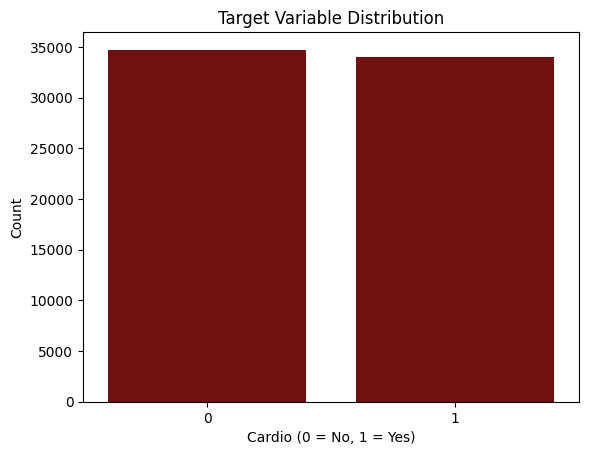

In [18]:
sns.barplot(df['cardio'].value_counts(), color='maroon')
plt.xlabel('Cardio (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()


**3.2 Age vs Cardiovascular Disease**

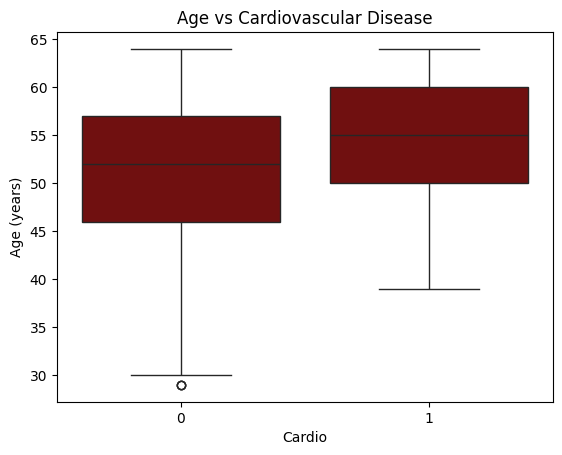

In [19]:
df.groupby('cardio')['age_years'].mean()

sns.boxplot(x='cardio', y='age_years', data=df, color= 'maroon')
plt.xlabel('Cardio')
plt.ylabel('Age (years)')
plt.title('Age vs Cardiovascular Disease')
plt.show()


**3.3 Age vs Cardiovascular Disease**

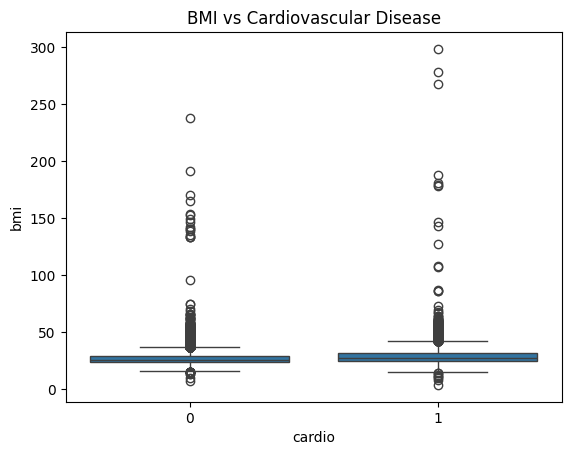

In [20]:
df.groupby('cardio')['bmi'].mean()
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title('BMI vs Cardiovascular Disease')
plt.show()


**Correlation:** Identify influential features.

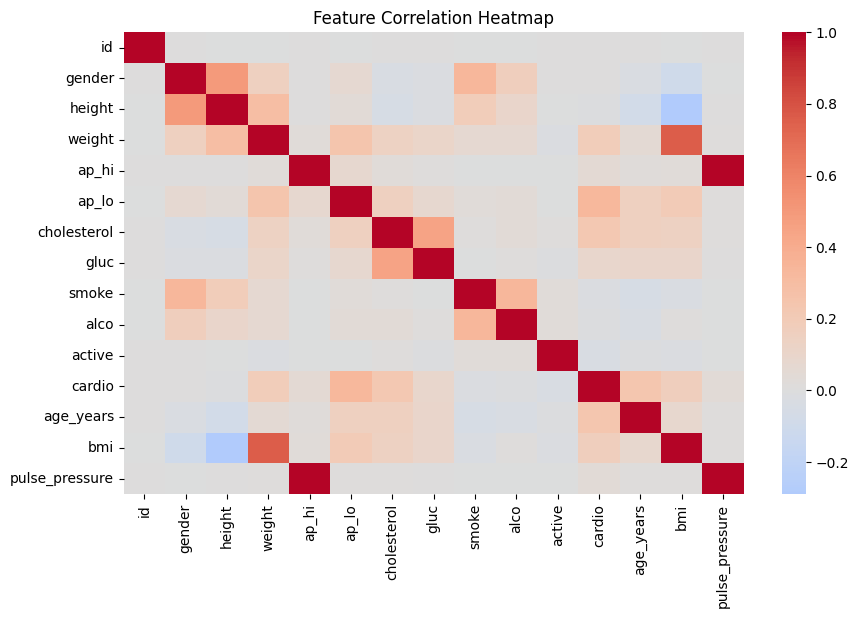

In [21]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

### 5. Model Building & Baseline Models

In [22]:
X = df.drop['cardio']

TypeError: 'method' object is not subscriptable